# IMDb Movie Reviews Dataset

The IMDb Movie Reviews Dataset is a popular benchmark dataset used for sentiment classification in natural language processing. It contains 50,000 movie reviews collected from the Internet Movie Database (IMDb), split evenly into:

25,000 Positive reviews
25,000 Negative reviews

Each review is a free-text comment left by a user about a movie and is labeled for binary sentiment classification (positive or negative).

# Analyze text data to classify it as positive, negative, or neutral

### Import Libraries

In [13]:
import pandas as pd
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Load IMDb Dataset

In [14]:
# Load IMDb dataset (CSV format)
df = pd.read_csv('IMDB_Dataset.csv')  # columns: 'review', 'sentiment'
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### Clean the Text

In [15]:
def clean_text(text):
    text = re.sub(r"<.*?>", "", text)         # Remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)    # Remove non-alphabetic chars
    text = text.lower()                       # Lowercase conversion
    text = text.strip()
    return text

df['clean_review'] = df['review'].apply(clean_text)

### Sentiment Analysis Using VADER (Lexicon-Based)

In [16]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['compound'] = df['clean_review'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['compound'].apply(get_sentiment)

print(df[['review', 'vader_sentiment']].head())


                                              review vader_sentiment
0  One of the other reviewers has mentioned that ...        negative
1  A wonderful little production. <br /><br />The...        positive
2  I thought this was a wonderful way to spend ti...        positive
3  Basically there's a family where a little boy ...        negative
4  Petter Mattei's "Love in the Time of Money" is...        positive


# Use NLP techniques and lexicons to detect specific emotions

### Install and Import Emotion Detection Library

In [17]:
# pip install nrclex

In [18]:
# !python -m textblob.download_corpora


In [19]:
from nrclex import NRCLex

def detect_emotion(text):
    emotion = NRCLex(text)
    return emotion.raw_emotion_scores

df['emotions'] = df['clean_review'].apply(detect_emotion)
print(df[['clean_review', 'emotions']].head())


                                        clean_review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production  the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there s a family where a little boy ...   
4  petter mattei s  love in the time of money  is...   

                                            emotions  
0  {'negative': 21, 'anger': 11, 'fear': 14, 'sad...  
1  {'joy': 2, 'positive': 14, 'surprise': 1, 'tru...  
2  {'anticipation': 9, 'joy': 5, 'positive': 8, '...  
3  {'disgust': 1, 'negative': 5, 'anger': 2, 'ant...  
4  {'joy': 13, 'positive': 19, 'anticipation': 13...  


### Visualize Emotion Distribution

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

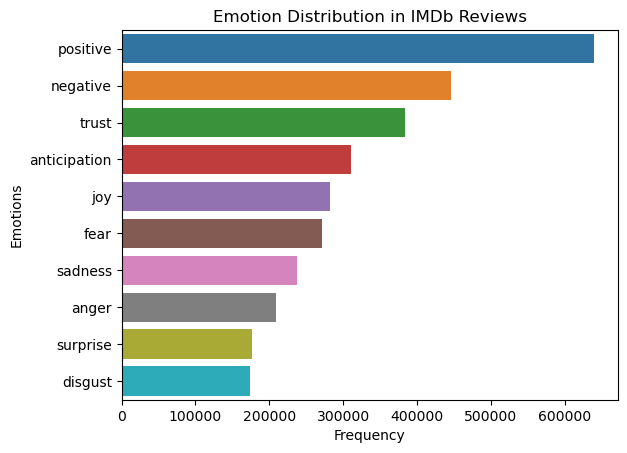

In [21]:
emotion_df = pd.DataFrame(df['emotions'].tolist())
emotion_sum = emotion_df.sum().sort_values(ascending=False)

sns.barplot(x=emotion_sum.values, y=emotion_sum.index)
plt.title("Emotion Distribution in IMDb Reviews")
plt.xlabel("Frequency")
plt.ylabel("Emotions")
plt.show()


# Understand public opinion and trends through sentiment patterns

### Sentiment Count Plot

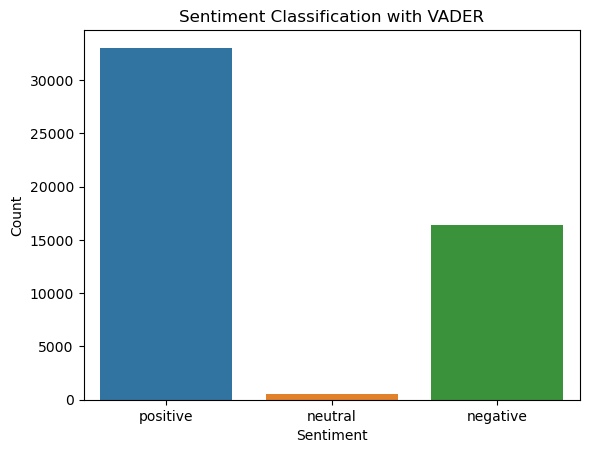

In [22]:
sns.countplot(data=df, x='vader_sentiment', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Classification with VADER")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
